# Comparison: Lift and Conviction
by Lily Djami

In this evaluation module, results from Apriori and ECLAT are compared with regards to lift and conviction. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from rules import save_results, load_results, rules_from_support
from mlxtend.frequent_patterns import association_rules


In [2]:
#read apriori support values
retail_apriori = load_results("Apriori\\apr_retail_0.02.support")
entree_apriori = load_results("Apriori\\apr_entree_0.1.support")

#read eclat support values
retail_eclat = load_results("ECLAT\\retail_0.05.support")
entree_eclat = load_results("ECLAT\\entree_0.1.support")

In [3]:
retail_eclat_rules = rules_from_support(retail_eclat[1])
retail_apriori_rules = association_rules(retail_apriori, min_threshold = 0)

entree_eclat_rules = rules_from_support(entree_eclat[1])
entree_apriori_rules = association_rules(entree_apriori, min_threshold = 0)

In [4]:
def frozenset_to_str(t):
    return "(" + ", ".join([str(i) for i in t]) + ")"

def sort_by_rule(rule_df):
    rule_list = [frozenset_to_str(rule_df['antecedents'][i]) + " -> " + frozenset_to_str(rule_df['consequents'][i])
                for i in range(rule_df.shape[0])]

    rule_df['rule'] = rule_list
    #rule_df = rule_df.sort_values('rule')
    #rule_df = rule_df.reset_index().drop(['index'], axis=1)



In [5]:
retail_eclat_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
2,(WOODLAND CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND),0.126915,0.245077,0.063457,0.500000,2.040179,0.032354,1.509847
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(WOODLAND CHARLOTTE BAG),0.245077,0.126915,0.063457,0.258929,2.040179,0.032354,1.178139
4,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018
6,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887
7,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN CIRCUS PARADE),0.245077,0.115974,0.056893,0.232143,2.001685,0.028470,1.151290
8,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
9,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951


## Lift

**Lift** the ratio of the observed support to that expected if X and Y were independent

If the rule had a lift of 1, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.
If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.
If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa.
The value of lift is that it considers both the support of the rule and the overall data set 



In [72]:
sort_by_rule(entree_eclat_rules)
sort_by_rule(entree_apriori_rules)

In [82]:
sorted_entree_apriori = entree_apriori_rules.sort_values('rule').reset_index().drop(['index'], axis=1)
sorted_entree_eclat = entree_eclat_rules.sort_values('rule').reset_index().drop(['index'], axis=1)

In [85]:
sorted_entree_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
0,(164.0),(205.0),0.193750,0.521394,0.120673,0.622829,1.194545,0.019653,1.268935,(164.0) -> (205.0)
1,(164.0),(52.0),0.193750,0.302885,0.103846,0.535980,1.769585,0.045162,1.502340,(164.0) -> (52.0)
2,(164.0),(75.0),0.193750,0.473558,0.112740,0.581886,1.228754,0.020989,1.259088,(164.0) -> (75.0)
3,(165.0),(205.0),0.178606,0.521394,0.123558,0.691790,1.326808,0.030434,1.552856,(165.0) -> (205.0)
4,(165.0),(75.0),0.178606,0.473558,0.108413,0.606999,1.281784,0.023833,1.339543,(165.0) -> (75.0)
...,...,...,...,...,...,...,...,...,...,...
145,"(75.0, 52.0)",(205.0),0.182692,0.521394,0.125721,0.688158,1.319842,0.030466,1.534770,"(75.0, 52.0) -> (205.0)"
146,(76.0),(205.0),0.270433,0.521394,0.144712,0.535111,1.026308,0.003709,1.029506,(76.0) -> (205.0)
147,(76.0),(206.0),0.270433,0.129327,0.105288,0.389333,3.010458,0.070314,1.425775,(76.0) -> (206.0)
148,(76.0),(53.0),0.270433,0.342308,0.112019,0.414222,1.210087,0.019448,1.122768,(76.0) -> (53.0)


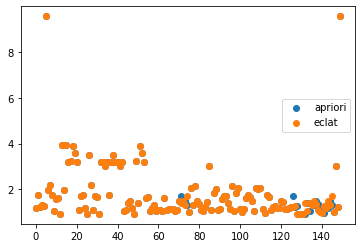

In [114]:

plt.scatter(range(entree_apriori_rules.shape[0]), sorted_entree_apriori['lift'], label='apriori')
plt.scatter(range(entree_eclat_rules.shape[0]), sorted_entree_eclat['lift'], label='eclat')
#plt.plot(entree_eclat_rules['lift'])
plt.legend()
plt.show()

In [113]:
comparison_df = pd.DataFrame()
comparison_df['rule'] = sorted_entree_apriori[sorted_entree_apriori['lift'] != sorted_entree_eclat['lift']]['rule']
comparison_df['lift apriori'] = sorted_entree_apriori[sorted_entree_apriori['lift'] != sorted_entree_eclat['lift']]['lift']
comparison_df['lift eclat'] = sorted_entree_eclat[sorted_entree_apriori['lift'] != sorted_entree_eclat['lift']]['lift']

comparison_df

,rule,lift apriori,lift eclat
71,"(205.0) -> (53.0, 75.0)",1.725419,1.386365
72,(205.0) -> (75.0),1.386365,1.484853
73,"(205.0) -> (75.0, 250.0)",1.484853,1.319842
74,"(205.0) -> (75.0, 52.0)",1.319842,1.725419
126,"(53.0, 75.0) -> (205.0)",1.725419,1.228754
127,(75.0) -> (164.0),1.228754,1.281784
128,(75.0) -> (165.0),1.281784,0.928787
129,(75.0) -> (174.0),0.928787,0.929618
130,(75.0) -> (191.0),0.929618,0.940007
131,"(75.0) -> (191.0, 192.0)",0.940007,0.938323


In [112]:
sorted_entree_eclat['rule']

0           (164.0) -> (205.0)
1            (164.0) -> (52.0)
2            (164.0) -> (75.0)
3           (165.0) -> (205.0)
4            (165.0) -> (75.0)
                ...           
145    (75.0, 53.0) -> (205.0)
146          (76.0) -> (205.0)
147          (76.0) -> (206.0)
148           (76.0) -> (53.0)
149          (78.0) -> (170.0)
Name: rule, Length: 150, dtype: object

## Conviction

**Conviction**  measures the expected error of the rule 

that is, how often X occurs in a transaction where Y does not. It is thus a measure of the strength of a rule with respect to the complement of the consequent. A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1


Sources:
- \cite{zaki2020}
- http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/